# CS4049 Assignment 2 - Atari Deep Learning

In [1]:
# For deep neural networks
import tensorflow.compat.v1 as tf
import tf_slim as slim

# For data representation
import numpy as np
import random

# For handling files
import os

# For plotting graphs
import matplotlib
import matplotlib.pyplot as plt

# OpenAI Gym
import gym
# I have installed pyglet-1.5.11 for it work with BigSur

# Cael Defined Tools
from Tools.preprocessing import *

ModuleNotFoundError: No module named 'tensorflow'

# Reinforcement Learning with Frames

## Task 1.1: Create Environment (Investigate Action Space)

In [10]:
# Create Environment
env = gym.make("Assault-v0")

# Get environment information
height, width, channels = env.observation_space.shape   # Image shape
num_actions = env.action_space.n    # Number of actions

# Describe Action & Observation Space
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

env.reset()
next_obs, reward, done, info = env.step(0)
print(info)

Action space:  Discrete(7)
Observation space:  Box(250, 160, 3)
{'ale.lives': 4}


In [11]:
action_names = env.unwrapped.get_action_meanings() # Actions we can take
action_names

['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [6]:
# class RandomAgent():
#     def __init__(self, env):
#         self.action_size = env.action_space.n
#
#     def get_action(self, observation):
#         return random.choice(range(self.action_size))
#
# reward_episodes = []
# numberOfEpisodes = 10
# agent = RandomAgent(env)
# for ep in range(numberOfEpisodes):
#     current_obs = env.reset()
#     done = False
#     total_reward_ep = 0
#     while not done:
#         action = agent.get_action(current_obs)
#         next_obs, reward, done, info = env.step(action)
#         env.render()
#         total_reward_ep += reward
#     reward_episodes.append(total_reward_ep)
#
# print("Average reward per episode: {}".format(np.sum(reward_episodes)/numberOfEpisodes))
# env.close()

## Task 1.3: Pre-Processing

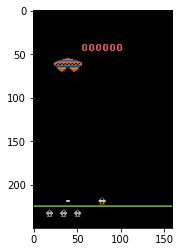

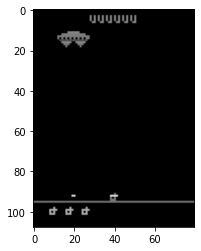

In [7]:
obs = env.reset()

plt.imshow(obs)
plt.show()
plt.imshow(preprocess_observation(obs).reshape(108, 80), cmap="gray", vmin=-128, vmax=127)

## Task 1.4: Implement Deep Convolutional Network

### Create Deep Convolutional Network

In [9]:
from tensorflow.keras.models import Sequential  # Builds sequential deep learning models
from tensorflow.keras.layers import Dense, Flatten, Convolution2D   # Dense layer, flatten layer, convolutional layer
from tensorflow.keras.optimizers import Adam    # Model optimiser

### Create Using Deep Convolutional Network

In [40]:
def build_model(height, width, channels, num_actions):
    model = Sequential()    #
    # Params: Num filters, size of filters, num strides (how big of a step the filters take when looking around image), activation function, input shape (the 3 means number of images passed in)
    model.add(Convolution2D(32, (8, 8), strides=(4, 4), activation="relu", input_shape=(3, height, width, channels)))   # Add convolution layer to model
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation="relu"))   # Add convolution layer to model
    model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation="relu"))   # Add convolution layer to model
    model.add(Flatten()) # Turn all layers into one layer
    model.add(Dense(512, activation="relu"))   # Every node in layer is connected to every node in the next layer
    model.add(Dense(256, activation="relu"))
    model.add(Dense(num_actions, activation="linear"))
    return model

In [41]:
convModel = build_model(height, width, channels, num_actions)

ValueError: Input 0 of layer conv2d_12 is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: [None, 3, 250, 160, 3]

In [33]:
del convModel

In [35]:
convModel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 61, 39, 32)        6176      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 18, 64)        32832     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 16, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 27648)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               14156288  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 7)                

## Build Agent

In [27]:
from rl.agents import DQNAgent  # Reinforcemment learning agent
from rl.memory import SequentialMemory  # Retain some memory from previous games
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy    # helps find optimal strategy quicker, Find best reward

In [31]:
def build_agent(model, num_actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, enable_dueling_network=True, dueling_type='avg', nb_actions=num_actions, nb_steps_warmup=1000)
    """
    Dualing network - split value and advantage, help the model learn when to take action and when not to bother. Essentially a modified network
    """

    return dqn

In [39]:
agent = build_agent(convModel, num_actions)
agent.compile(Adam(lr=1e-4))
# agent.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)


ValueError: Error when checking input: expected conv2d_9_input to have 4 dimensions, but got array with shape (1, 3, 250, 160, 3)

In [ ]:
numTrainingEpisodes = 100
for i in range(numTrainingEpisodes):
    agent.trainable_model.train_step()

In [ ]:
scores = agent.test(env, nb_episodes=10, visualize=True)
print(np.mean(scores.history["episode_reward"]))

### Train Model

In [38]:
# numSteps = 10000
# agent.train_step_counter.assign(0)
# for i in range(numSteps):
#     # agent.train
#     print(i)

AttributeError: 'DQNAgent' object has no attribute 'train_step_counter'

# Reinforcement Learning with RAM

# Reinforcement Learning by Mixing Screen and RAM